In [4]:
import numpy as np
import matplotlib.pyplot as plt

from classes.projectile import Projectile
from classes.constant import * 
from classes import trajectories as Trajectory

ImportError: attempted relative import with no known parent package

In [13]:
projectile = Projectile("S&B FMJ 147grs", cal_inch=0.308, m_grs=147, G1=0.489, SD_inch=0.221)

In [14]:
trajectory = Trajectory.trajectoryODE(projectile,735)
compacted = Trajectory.normTwoCols(Trajectory.compact(trajectory,ran=900),(2,3))

In [15]:
Trajectory.printTable(compacted)

x: 100.0, y: -0.10762837534340494, v: 677.2477706304894
x: 200.0, y: -0.42001910409405774, v: 627.9132604770515
x: 300.0, y: -0.9640432818385013, v: 582.6451319965555
x: 400.0, y: -1.8206747920366924, v: 538.9410699565296
x: 500.0, y: -2.990542639219555, v: 499.4080608287237
x: 600.0, y: -4.58504536932468, v: 461.9660797828049
x: 700.0, y: -6.678125539323569, v: 426.92577894080523
x: 800.0, y: -9.23292029217464, v: 395.6319682473336
x: 900.0, y: -12.412390848151361, v: 366.55002864424137


In [16]:
p = Trajectory.approximate(compacted,3)
print(p)

            3             2
-9.608e-09 x - 5.966e-06 x - 0.0006699 x + 0.02899


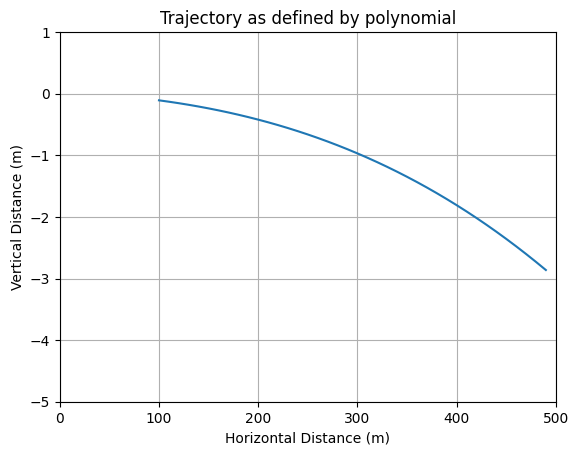

In [17]:
ran,step = 500,10
x = np.arange(100,ran,step)
y = p(x)

Trajectory.plot(x,y,name="Trajectory as defined by polynomial",x_limit=(0,ran),y_limit=(1,-5))

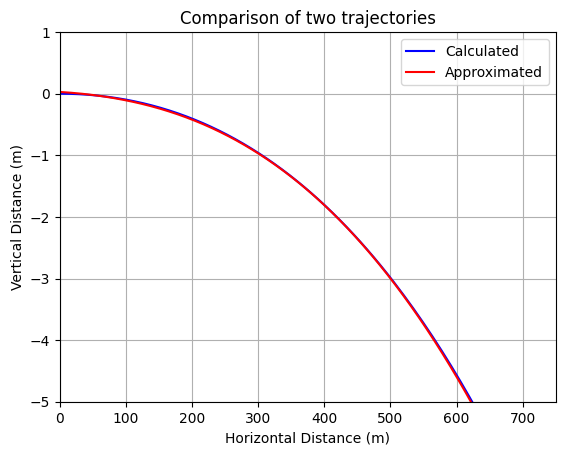

In [18]:
x_2 = np.arange(0,1000)
Trajectory.compare(trajectory[:,0],trajectory[:,1],x_2,p(x_2),x_limit=(0,750),y_limit=(1,-5),name1="Calculated",name2="Approximated")

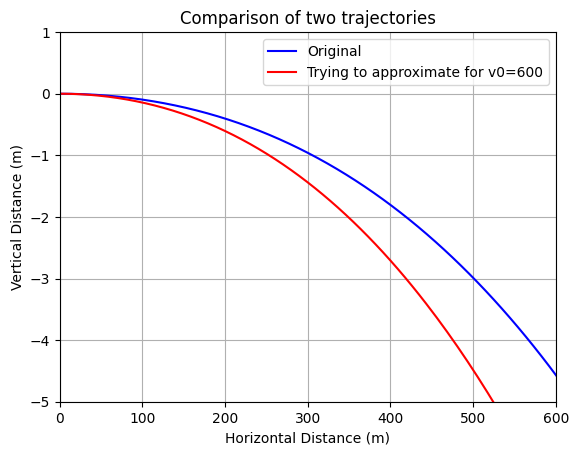

In [19]:
trajectory2 = Trajectory.trajectoryODE(projectile,600)
Trajectory.compare(trajectory[:,0],trajectory[:,1],trajectory2[:,0],trajectory2[:,1],x_limit=(0,600),y_limit=(1,-5),name1="Original",name2="Trying to approximate for v0=600")

p = Trajectory.approximate(compacted,4)


myšlenka

In [20]:
s = p
v = np.poly1d.deriv(s)
a = np.poly1d.deriv(v)
print(a)

           2
4.918e-13 x - 5.814e-08 x - 1.182e-05


In [21]:
m = projectile.m_kg
test = np.arange(100,700,1)
Fdrag = m*a(test)